<a href="https://colab.research.google.com/github/anand176/JackFruit__Ripeness-Detection-System/blob/master/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#run 1
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
#run 2
#CREATING LABELS FOR RESIZED IMAGES
#RIPE=1,UNRIPE=0
import os
labels=[]
file_names=os.listdir('/content/drive/MyDrive/anand_images_one/resized/')
for file in file_names:
    if file[0]=='r':
        labels.append(1)
    elif file[0]=='u':
        labels.append(0)

In [ ]:
#run 3
import cv2
import glob
image_directory='/content/drive/MyDrive/anand_images_one/resized/'
image_extension=['png','jpg','jpeg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e))for e in image_extension]
images_array=np.asarray([cv2.imread(file) for file in files])
print(type(images_array))
print(images_array)

<class 'numpy.ndarray'>
[[[[ 70 193 195]
   [  7 130 132]
   [ 28 148 153]
   ...
   [  2  83 110]
   [  3  82 109]
   [  5  84 111]]

  [[ 48 171 173]
   [ 61 184 186]
   [ 13 133 138]
   ...
   [  1  82 109]
   [  3  82 109]
   [  6  85 112]]

  [[ 12 136 136]
   [ 70 194 194]
   [ 34 155 157]
   ...
   [  0  80 107]
   [  3  82 109]
   [  7  86 113]]

  ...

  [[100 226 227]
   [ 95 221 222]
   [117 244 243]
   ...
   [  0  10  17]
   [  0   9  16]
   [  0   7  14]]

  [[ 93 219 220]
   [106 232 233]
   [114 241 240]
   ...
   [  0  13  18]
   [  0  12  17]
   [  0  10  15]]

  [[ 90 216 217]
   [114 240 241]
   [112 239 238]
   ...
   [  0  15  20]
   [  0  14  19]
   [  0  12  17]]]


 [[[ 96 210 210]
   [ 96 210 210]
   [ 96 210 210]
   ...
   [ 12  13  23]
   [ 13  14  24]
   [ 15  16  26]]

  [[ 96 210 210]
   [ 96 210 210]
   [ 96 210 210]
   ...
   [ 12  13  23]
   [ 13  14  24]
   [ 15  16  26]]

  [[ 96 210 210]
   [ 96 210 210]
   [ 96 210 210]
   ...
   [ 12  13  23]
   [

In [ ]:
# run 4
print(images_array.shape)

(898, 224, 224, 3)


In [ ]:
#run 5
X=images_array
Y=np.asarray(labels)

In [ ]:
X=images_array
Y=[]
Y=np.asarray(labels)


In [ ]:
#run 6
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(len(X))
print(len(Y))
print(X.shape)
print(Y.shape)

772
773
(772, 224, 224, 3)
(773,)


In [ ]:
missing_in_X = np.isnan(X).any()
if missing_in_X:
    print("Missing values found in X!")
else:
    print("No missing values found in X.")


No missing values found in X.


In [ ]:
missing_in_Y = np.isnan(Y).any()
if missing_in_Y:
    print("Missing values found in Y!")
else:
    print("No missing values found in Y.")


No missing values found in Y.


In [ ]:
#run 7
print(X.shape,X_train.shape,X_test.shape)

(898, 224, 224, 3) (718, 224, 224, 3) (180, 224, 224, 3)


In [ ]:
#run 8
#scaling data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
#run 9
print(X_train_scaled)

[[[[0.96862745 0.96078431 0.91764706]
   [0.90196078 0.91764706 0.87058824]
   [0.72156863 0.78823529 0.73333333]
   ...
   [0.29411765 0.60784314 0.54117647]
   [0.34901961 0.67058824 0.6       ]
   [0.32941176 0.65098039 0.57647059]]

  [[0.96862745 0.96078431 0.91764706]
   [0.91764706 0.93333333 0.88627451]
   [0.74901961 0.81568627 0.76078431]
   ...
   [0.20784314 0.51764706 0.4627451 ]
   [0.28235294 0.60392157 0.53333333]
   [0.31764706 0.63921569 0.56470588]]

  [[0.97254902 0.96470588 0.92156863]
   [0.94509804 0.96078431 0.91372549]
   [0.8        0.85882353 0.80392157]
   ...
   [0.16470588 0.4745098  0.42352941]
   [0.22352941 0.54117647 0.48235294]
   [0.29019608 0.61176471 0.54117647]]

  ...

  [[0.2745098  0.60392157 0.58823529]
   [0.24313725 0.56470588 0.54509804]
   [0.21176471 0.53333333 0.51372549]
   ...
   [0.10980392 0.12941176 0.14117647]
   [0.14509804 0.16470588 0.17647059]
   [0.10196078 0.12156863 0.13333333]]

  [[0.21960784 0.56078431 0.52156863]
   [0.2

In [ ]:
#run 10
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)

2.15.0


In [ ]:
#run 11
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
#run 12
num_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#run 13
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']

)

In [ ]:
#run 14
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
23/23 [==============================] - 31s 1s/step - loss: 0.5724 - acc: 0.6797
Epoch 2/5
23/23 [==============================] - 26s 1s/step - loss: 0.2936 - acc: 0.8900
Epoch 3/5
23/23 [==============================] - 27s 1s/step - loss: 0.1892 - acc: 0.9610
Epoch 4/5
23/23 [==============================] - 29s 1s/step - loss: 0.1285 - acc: 0.9847
Epoch 5/5
23/23 [==============================] - 29s 1s/step - loss: 0.0974 - acc: 0.9930


In [ ]:
#run 15
#mobilenetv2 transfer learing using jackfruit dataset and 5 epochs
score,acc=model.evaluate(X_test_scaled,Y_test)
print('test loss=',score)
print('test accuracy=',acc)

6/6 [==============================] - 8s 1s/step - loss: 0.1214 - acc: 0.9833
test loss= 0.12136942893266678
test accuracy= 0.9833333492279053


path of img to be predicted:/content/drive/MyDrive/unripe_test_one.jpeg


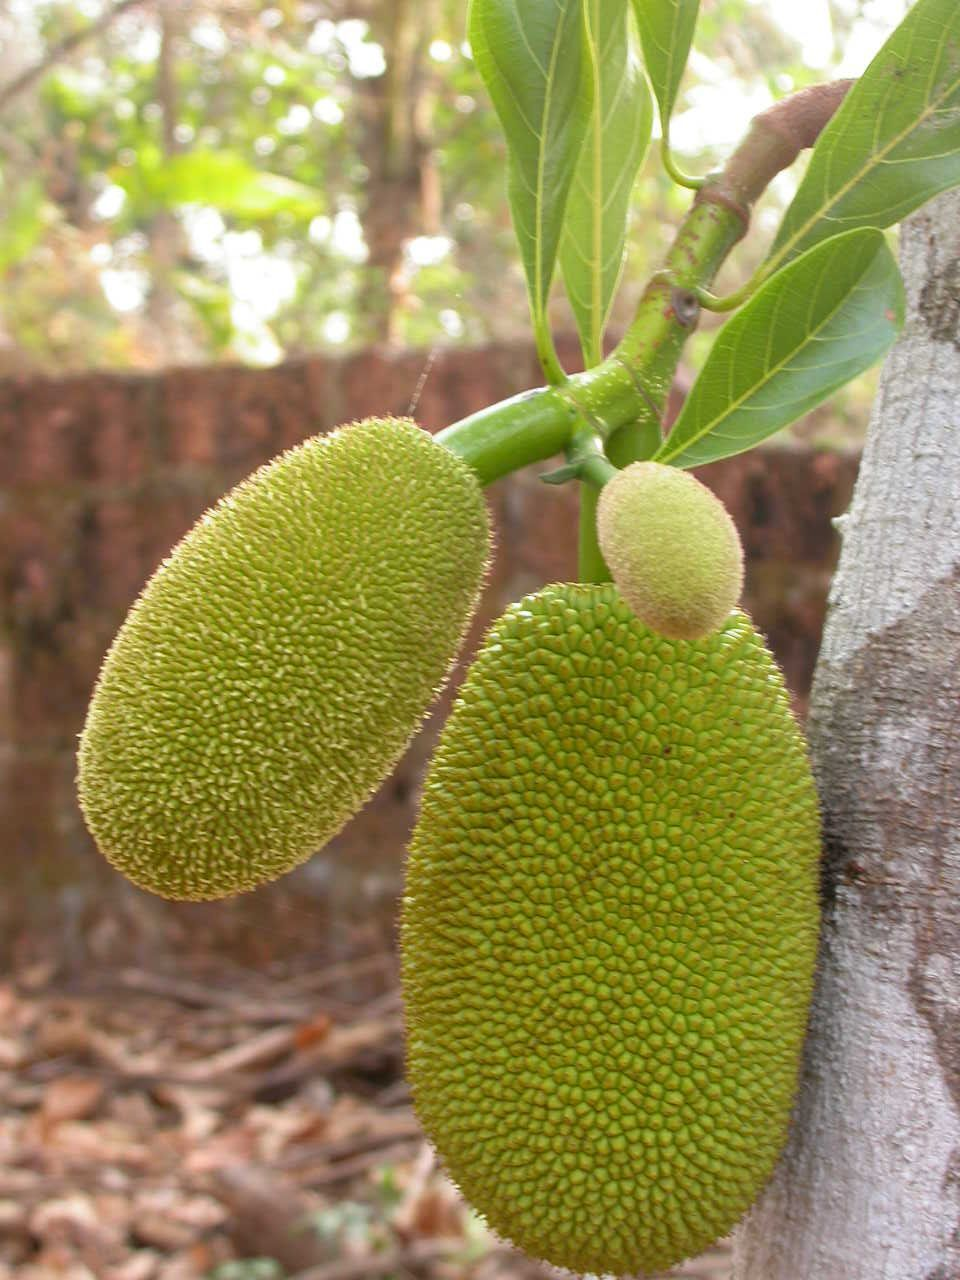

1/1 [==============================] - 0s 211ms/step
unripe


In [ ]:
#run 16
#predictive system
import cv2
from google.colab.patches import cv2_imshow

input_image_path=input('path of img to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
if input_pred_label==1:
  print('ripe')
else:
  print('unripe')

In [ ]:
model.save('/content/drive/MyDrive/cd_ss/pjcone_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
